<a href="https://colab.research.google.com/github/louise-queiroz/CNC/blob/main/TrabalhoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **Trabalho Final**
#### Grupo: Bianca Beppler Dullius, Louise Queiroz da Silva Bezerra e Maria Júlia Duarte Lorenzoni
#### Tema: Método dos Mínimos Quadrados (MMQ), para ajustar uma curva dos dados históricos e prever quanto tempo os usuários passarão nas redes sociais no futuro
#### Dataset: Average Time Spent By A User On Social Media

In [ ]:
data_set = pd.read_csv('data.csv')
data_set = data_set.sort_values(by='age')
data_set.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
982,18,female,9,Instagram,Sports,United Kingdom,Sub_Urban,Marketer Manager,15212,False,True,True
847,18,male,3,Instagram,Lifestlye,United States,Urban,Software Engineer,14498,False,False,False
620,18,male,9,Facebook,Sports,United States,Rural,Student,16732,False,False,False
445,18,female,7,YouTube,Lifestlye,Australia,Sub_Urban,Marketer Manager,15153,True,False,False
437,18,male,4,YouTube,Sports,United Kingdom,Urban,Software Engineer,10250,True,True,True


##Função MMQ

In [ ]:
import numpy as np

def MMQ(x, y, grau='linear'):
    n = len(x)
    roots = np.zeros(n)
    xy = np.zeros(n)
    xx = np.zeros(n)
    xxx = np.zeros(n)
    x4 = np.zeros(n)
    x2y = np.zeros(n)

    for i in range(n):
        xy[i] = x[i] * y[i]
        xx[i] = x[i] ** 2
        xxx[i] = x[i] ** 3
        x4[i] = x[i] ** 4
        x2y[i] = (x[i]**2) * y[i]

    sumx = sum(x)
    sumy = sum(y)
    sumxy = sum(xy)
    sumx2 = sum(xx)
    sumx3 = sum(xxx)
    sumx4 = sum(x4)
    sumx2y = sum(x2y)

    if grau == 'linear':
        a = (n * sumxy - sumx * sumy) / (n * sumx2 - sumx**2)
        b = (sumy * sumx2 - sumx * sumxy) / (n * sumx2 - sumx**2)
        f = lambda x: a * x + b
    elif grau == 'parabola':
        a = (n * (sumx2y - sumx * sumxy) - (sumxy*(sumx**2) - sumy*sumx2)) / (n * (sumx4 - (sumx2**2)) - (sumx2*(sumx**2) - sumx*sumx3))
        b = (n * (sumxy * sumx3 - sumy*sumx4) - (sumx*sumy*sumx2 - sumy*(sumx2**2))) / (n*(sumx4 - (sumx2**2)) - (sumx2*(sumx**2) - sumx*sumx3))
        c = (sumy - b*sumx - a*sumx2) / n
        f = lambda x: a * x ** 2 + b * x + c
    elif grau == 'potencia':
        log_x = np.log(x + 1e-10)  # evitar log(0)
        log_y = np.log(y + 1e-10)
        b = (n * sumxy - sumx * sumy) / (n * sumx2 - sumx**2)
        a = np.exp((sumy - b * sumx) / n)
        f = lambda x: a * np.exp(b * x)

    for i in range(n):
        roots[i] = f(x[i])

    if grau == 'linear':
        return a, b, None, roots
    elif grau == 'parabola':
        return a, b, c, roots
    elif grau == 'potencia':
        return a, b, None, roots

## Aplicação do MMQ linear no dataset

In [ ]:
idade = data_set['age'].values
tempo = data_set['time_spent'].values

a, b, _, _ = MMQ(idade, tempo)

print("Coeficiente 'a' (inclinação):", a)
print("Coeficiente 'b' (intercepto):", b)


#Exemplos de idades
idade_teste = 38
tempo_previsto = a * idade_teste + b
print("Tempo previsto para a idade de", idade_teste, "anos:", tempo_previsto)

idade_teste = 25
tempo_previsto = a * idade_teste + b
print("Tempo previsto para a idade de", idade_teste, "anos:", tempo_previsto)

previsto_por_idade = {}

for idade_teste in idade:
    tempo_previsto = a * idade_teste + b
    previsto_por_idade[idade_teste] = tempo_previsto

Coeficiente 'a' (inclinação): -0.006360063988640963
Coeficiente 'b' (intercepto): 5.2896735826384385
Tempo previsto para a idade de 38 anos: 5.0479911510700815
Tempo previsto para a idade de 25 anos: 5.130671982922414


### Ajuste de reta no padrão

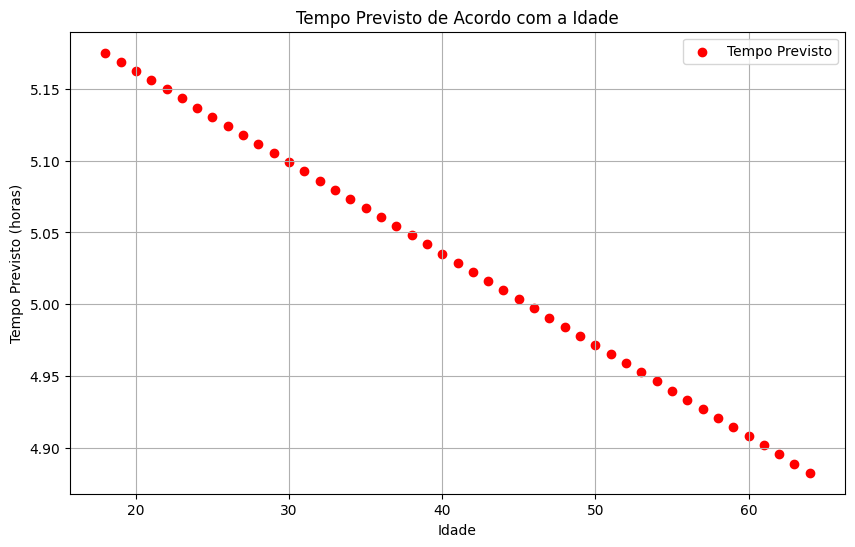

In [ ]:
idades = list(previsto_por_idade.keys())
tempo_previsto = list(previsto_por_idade.values())

plt.figure(figsize=(10, 6))
plt.scatter(idades, tempo_previsto, color='red', label='Tempo Previsto')

plt.title('Tempo Previsto de Acordo com a Idade')
plt.xlabel('Idade')
plt.ylabel('Tempo Previsto (horas)')
plt.grid(True)
plt.legend()

plt.show()


##Utilizando biblioteca Sklearn para confirmar a regressão linear

Coeficiente 'a' (inclinação): -0.006360063988640958
Coeficiente 'b' (intercepto): 5.2896735826384385


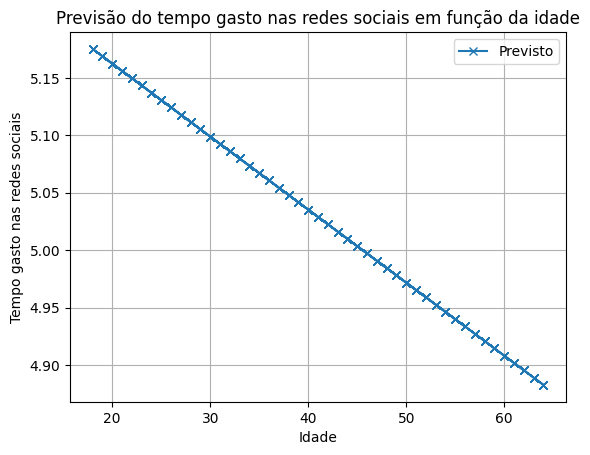

In [ ]:
from sklearn.linear_model import LinearRegression

idade_verdadeira = data_set['age']
tempo_gasto_verdadeiro = data_set['time_spent']

soma_tempo_verdadeiro_por_idade = idade_verdadeira.groupby(idade_verdadeira).sum()

idade_verdadeira = data_set['age'].values
tempo_gasto_verdadeiro = data_set['time_spent'].values

modelo = LinearRegression()
modelo.fit(idade_verdadeira.reshape(-1, 1), tempo_gasto_verdadeiro)

a_pred = modelo.coef_[0]
b_pred = modelo.intercept_

print("Coeficiente 'a' (inclinação):", a_pred)
print("Coeficiente 'b' (intercepto):", b_pred)

idade_pred = idade_verdadeira
tempo_pred = modelo.predict(idade_verdadeira.reshape(-1, 1))


plt.plot(idade_pred, tempo_pred, 'x-', label='Previsto')
plt.xlabel('Idade')
plt.ylabel('Tempo gasto nas redes sociais')
plt.title('Previsão do tempo gasto nas redes sociais em função da idade')
plt.legend()
plt.grid(True)
plt.show()

##Comparação final entre ajuste de reta e dados reais

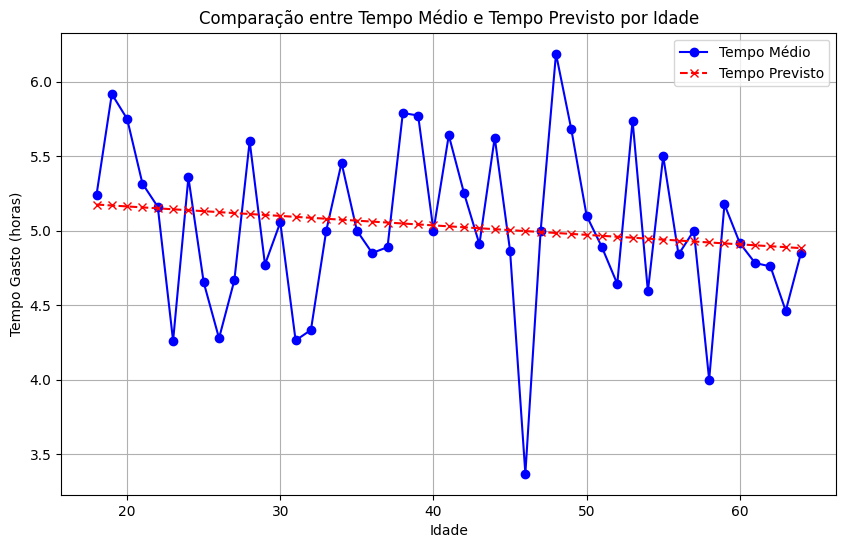

In [ ]:
soma_tempo_por_idade = data_set.groupby('age')['time_spent'].mean()
plt.figure(figsize=(10, 6))

# Plotar a média do tempo gasto por idade
plt.plot(soma_tempo_por_idade.index, soma_tempo_por_idade.values, marker='o', color='blue', linestyle='-', label='Tempo Médio')

# Plotar o tempo previsto pela regressão linear
plt.plot(previsto_por_idade.keys(), previsto_por_idade.values(), marker='x', color='red', linestyle='--', label='Tempo Previsto')

# Adicionar rótulos e título
plt.title('Comparação entre Tempo Médio e Tempo Previsto por Idade')
plt.xlabel('Idade')
plt.ylabel('Tempo Gasto (horas)')
plt.grid(True)
plt.legend()

# Mostrar o gráfico
plt.show()